# Finding Target Users

I will try to walk through how I analyzed data to find target users for the ZIP codes `32805`, `32808` and `32822` which are located in Orlando, FL. Feel free to mess around and conduct your own analysis
> I downloaded the datasets from https://www.census.gov/programs-surveys/acs/data.html
 


In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", rc={"figure.figsize": (8, 6), "axes.titlesize": 15})

In [17]:
file_paths = [
    'data/Demograph_Y2022.csv',
    'data/Economic_Y2022.csv',
    'data/Housing_Y2022.csv',
    'data/Social_Y2022.csv',
]

#### Data Loading and Cleaning:
- Remove `Margin of Error` Columns and the last empty column that always starts with `Unnamed` as they are not needed. I am doing this before I merge the datasets.
- Standardize Column Names for readability but keep the estimate and percent indicator.
- Clean 'Geographic Area Name' to be just ZIP code.

I am going to save the datasets as a list and then join them on the `Geography` and `Geographic Area Name`. After that we will standardize column names and clean the data.

In [29]:
def load_and_clean_csv(file_path):
    df = pd.read_csv(file_path, header=1)
    # Drop 'Margin of Error'
    df = df.loc[:, ~df.columns.str.contains('Margin of Error|Unnamed')]
    return df

dfs = [load_and_clean_csv(path) for path in file_paths]
#len(dfs)

In [126]:
merged_df = dfs[0]

for next_df in dfs[1:]:
    merged_df = pd.merge(merged_df, next_df, on=['Geography', 'Geographic Area Name'], how='inner')

merged_df

,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Total population!!Under 5 years,Estimate!!SEX AND AGE!!Total population!!5 to 9 years,Estimate!!SEX AND AGE!!Total population!!10 to 14 years,Estimate!!SEX AND AGE!!Total population!!15 to 19 years,...,Percent!!ANCESTRY!!Total population!!Slovak,Percent!!ANCESTRY!!Total population!!Subsaharan African,Percent!!ANCESTRY!!Total population!!Swedish,Percent!!ANCESTRY!!Total population!!Swiss,Percent!!ANCESTRY!!Total population!!Ukrainian,Percent!!ANCESTRY!!Total population!!Welsh,Percent!!ANCESTRY!!Total population!!West Indian (excluding Hispanic origin groups),Percent!!COMPUTERS AND INTERNET USE!!Total households,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription
0,860Z200US32805,ZCTA5 32805,17791,8598,9193,93.5,832,565,810,856,...,0.0,0.7,0.3,0.0,0.0,0.2,10.9,6846,87.2,74.1
1,860Z200US32808,ZCTA5 32808,62827,29763,33064,90.0,5033,4688,5493,4986,...,0.1,0.6,0.0,0.0,0.0,0.3,25.4,19816,95.6,85.8
2,860Z200US32822,ZCTA5 32822,68321,33477,34844,96.1,3969,3270,3834,3669,...,0.0,0.6,0.1,0.1,0.3,0.1,2.6,23943,96.8,90.9


Alright so we basically have 1050 columns in this dataset and they are divided into Estimate and Percent. We will use a combination of both columns to create like our user profile. Feel free to criticize and comment on my selections.

#### Estimate Columns

1. Total Population
2. Total Housing Units
3. Income and Benefits
4. Employment Status Estimates
5. Educational Attainment 
6. Health Insurance Coverage

#### Percent Columns

1. Population Percentages by Age, Sex, Race
2. Household and Family Types Percentages
3. Educational Attainment Percentages
4. Income Distribution Percentages 
5. Housing Characteristics Percentages
6. Language Spoken at Home and English Proficiency Percentages

Before we do that we need to clean the column names and ZIP. I forgot that :P

In [127]:
def clean_column_name(column):
    return (column.lower().replace('!!', '_').replace(' ', '_').replace(',', '')
            .replace('(', '').replace(')', '').replace('estimate', 'est')
            .replace('percent', 'per').replace('population', 'pop')
           )

merged_df.columns = [clean_column_name(col) for col in merged_df.columns]

merged_df 
#print(merged_df.columns.to_list())

,geography,geographic_area_name,est_sex_and_age_total_pop,est_sex_and_age_total_pop_male,est_sex_and_age_total_pop_female,est_sex_and_age_total_pop_sex_ratio_males_per_100_females,est_sex_and_age_total_pop_under_5_years,est_sex_and_age_total_pop_5_to_9_years,est_sex_and_age_total_pop_10_to_14_years,est_sex_and_age_total_pop_15_to_19_years,...,per_ancestry_total_pop_slovak,per_ancestry_total_pop_subsaharan_african,per_ancestry_total_pop_swedish,per_ancestry_total_pop_swiss,per_ancestry_total_pop_ukrainian,per_ancestry_total_pop_welsh,per_ancestry_total_pop_west_indian_excluding_hispanic_origin_groups,per_computers_and_internet_use_total_households,per_computers_and_internet_use_total_households_with_a_computer,per_computers_and_internet_use_total_households_with_a_broadband_internet_subscription
0,860Z200US32805,ZCTA5 32805,17791,8598,9193,93.5,832,565,810,856,...,0.0,0.7,0.3,0.0,0.0,0.2,10.9,6846,87.2,74.1
1,860Z200US32808,ZCTA5 32808,62827,29763,33064,90.0,5033,4688,5493,4986,...,0.1,0.6,0.0,0.0,0.0,0.3,25.4,19816,95.6,85.8
2,860Z200US32822,ZCTA5 32822,68321,33477,34844,96.1,3969,3270,3834,3669,...,0.0,0.6,0.1,0.1,0.3,0.1,2.6,23943,96.8,90.9


In [128]:
merged_df['geographic_area_name'] = merged_df['geographic_area_name'].apply(lambda x: x.split(' ')[1])
merged_df.rename(columns={'geographic_area_name': 'zip_code'}, inplace=True)


merged_df

,geography,zip_code,est_sex_and_age_total_pop,est_sex_and_age_total_pop_male,est_sex_and_age_total_pop_female,est_sex_and_age_total_pop_sex_ratio_males_per_100_females,est_sex_and_age_total_pop_under_5_years,est_sex_and_age_total_pop_5_to_9_years,est_sex_and_age_total_pop_10_to_14_years,est_sex_and_age_total_pop_15_to_19_years,...,per_ancestry_total_pop_slovak,per_ancestry_total_pop_subsaharan_african,per_ancestry_total_pop_swedish,per_ancestry_total_pop_swiss,per_ancestry_total_pop_ukrainian,per_ancestry_total_pop_welsh,per_ancestry_total_pop_west_indian_excluding_hispanic_origin_groups,per_computers_and_internet_use_total_households,per_computers_and_internet_use_total_households_with_a_computer,per_computers_and_internet_use_total_households_with_a_broadband_internet_subscription
0,860Z200US32805,32805,17791,8598,9193,93.5,832,565,810,856,...,0.0,0.7,0.3,0.0,0.0,0.2,10.9,6846,87.2,74.1
1,860Z200US32808,32808,62827,29763,33064,90.0,5033,4688,5493,4986,...,0.1,0.6,0.0,0.0,0.0,0.3,25.4,19816,95.6,85.8
2,860Z200US32822,32822,68321,33477,34844,96.1,3969,3270,3834,3669,...,0.0,0.6,0.1,0.1,0.3,0.1,2.6,23943,96.8,90.9


### Let's Analyze!

Alright it looks like we have a pretty good looking dataset! I will start by first choosing the columns I want to analyze which was mentioned before and just visualize it.

This might not be the best way but I am using a for loop and analyzing the ZIP codes so it would look like analysis profile for every ZIP. 

In [355]:
columns = [col for col in merged_df.columns if 'computer' in col]
columns
#merged_df.to_csv('cleaneddata.csv')

['est_computers_and_internet_use_total_households',
 'est_computers_and_internet_use_total_households_with_a_computer',
 'est_computers_and_internet_use_total_households_with_a_broadband_internet_subscription',
 'per_computers_and_internet_use_total_households',
 'per_computers_and_internet_use_total_households_with_a_computer',
 'per_computers_and_internet_use_total_households_with_a_broadband_internet_subscription']

In [310]:
def extract_label(column, word):
    return column.split(word)[-1] if word in column else column

age_columns = [
    'est_sex_and_age_total_pop_under_5_years', 
    'est_sex_and_age_total_pop_5_to_9_years', 
    'est_sex_and_age_total_pop_10_to_14_years', 
    'est_sex_and_age_total_pop_15_to_19_years', 
    'est_sex_and_age_total_pop_20_to_24_years', 
    'est_sex_and_age_total_pop_25_to_34_years', 
    'est_sex_and_age_total_pop_35_to_44_years', 
    'est_sex_and_age_total_pop_45_to_54_years', 
    'est_sex_and_age_total_pop_55_to_59_years',
    'est_sex_and_age_total_pop_60_to_64_years',
    'est_sex_and_age_total_pop_65_to_74_years',
    'est_sex_and_age_total_pop_75_to_84_years',
    'est_sex_and_age_total_pop_85_years_and_over',
]

race_columns = [
    'est_race_total_pop_one_race_white',
    'est_race_total_pop_one_race_black_or_african_american',
    'est_race_total_pop_one_race_american_indian_and_alaska_native',
    'est_race_total_pop_one_race_asian',
    'est_race_total_pop_one_race_native_hawaiian_and_other_pacific_islander',
    'est_race_total_pop_one_race_some_other_race',
]

edu_columns = [
    'per_educational_attainment_pop_25_years_and_over_less_than_9th_grade',
    'per_educational_attainment_pop_25_years_and_over_9th_to_12th_grade_no_diploma',
    'per_educational_attainment_pop_25_years_and_over_high_school_graduate_includes_equivalency',
    'per_educational_attainment_pop_25_years_and_over_some_college_no_degree',
    "per_educational_attainment_pop_25_years_and_over_associate's_degree",
    "per_educational_attainment_pop_25_years_and_over_bachelor's_degree",
    'per_educational_attainment_pop_25_years_and_over_graduate_or_professional_degree',
]

occ_columns = [
        'est_occupation_civilian_employed_pop_16_years_and_over_management_business_science_and_arts_occupations',
        'est_occupation_civilian_employed_pop_16_years_and_over_service_occupations',
        'est_occupation_civilian_employed_pop_16_years_and_over_sales_and_office_occupations',
        'est_occupation_civilian_employed_pop_16_years_and_over_natural_resources_construction_and_maintenance_occupations',
        'est_occupation_civilian_employed_pop_16_years_and_over_production_transportation_and_material_moving_occupations',
    ]

sus_columns = ['est_house_heating_fuel_occupied_housing_units_utility_gas',
        'est_house_heating_fuel_occupied_housing_units_electricity',
        'est_house_heating_fuel_occupied_housing_units_solar_energy',
        'est_house_heating_fuel_occupied_housing_units_other_fuel',
        'est_house_heating_fuel_occupied_housing_units_no_fuel_used',
]


-----------------Analysis for ZIP Code: 32805------------------- 

--------------------Demographic Analysis------------------------ 

Total Population: 17791
Sex Ratio (Males per 100 Females): 93.5%


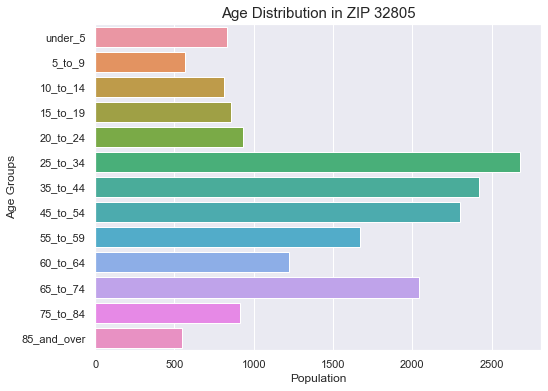

Top 5 age groups are: 

25_to_34: 2680
35_to_44: 2422
45_to_54: 2299
65_to_74: 2042
55_to_59: 1673

The median age is 43.7.



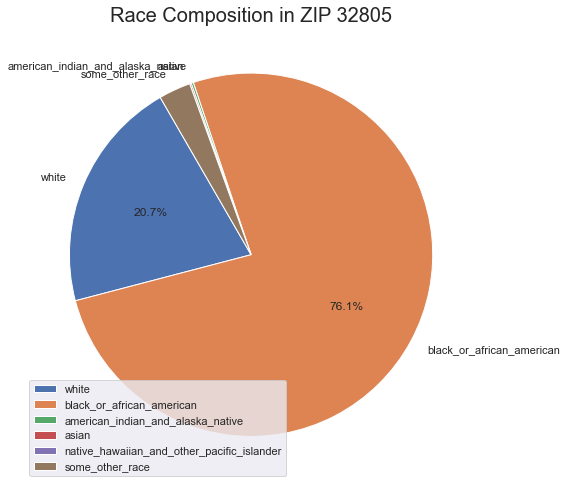

The majority race is black_or_african_american.



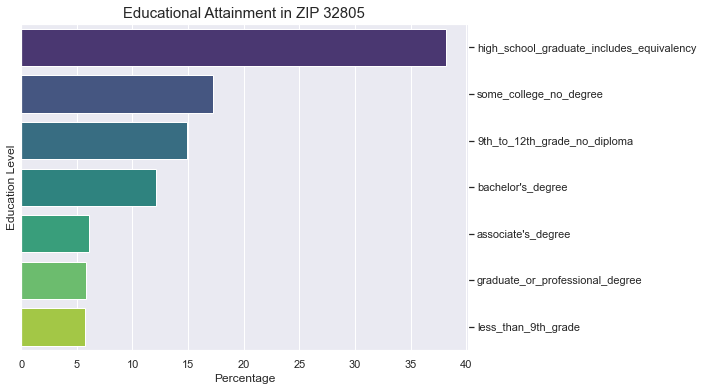

The majority of the population (ages 25 and above) have the education level high_school_graduate_includes_equivalency with 38.2%.

Employment Rate: 95.72% (8846/9242)
Poverty Rate (in last 12 months): 21.1%
Median Income for a worker: $28021


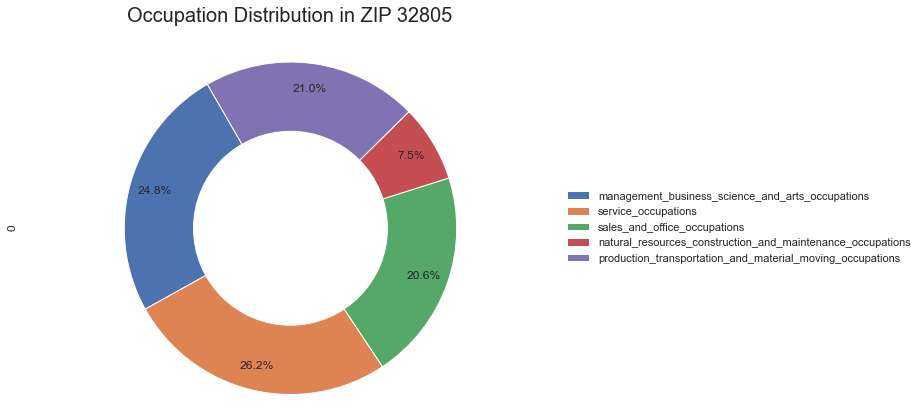

------------------------------------------------------------ 

--------------------Housing Analysis------------------------ 

Total Housing Units: 9350
Occupied/Vacant Housing Units: 6846/2504


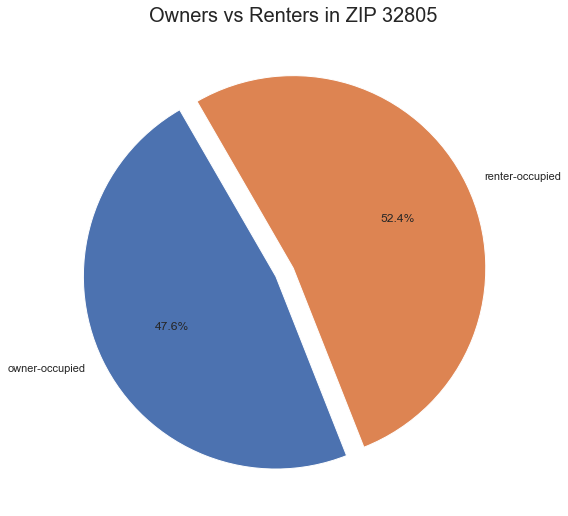

Majority of the housing units are renter-occupied
Median Household Income: $38885


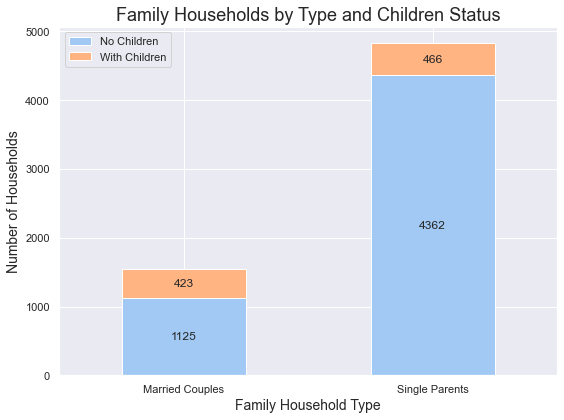

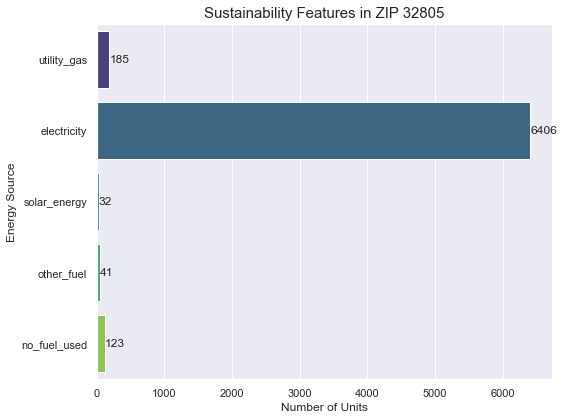

Number of units with solar energy installations: 32 

Out of 6846 occupied units, 6846 of them have computers and/or internet


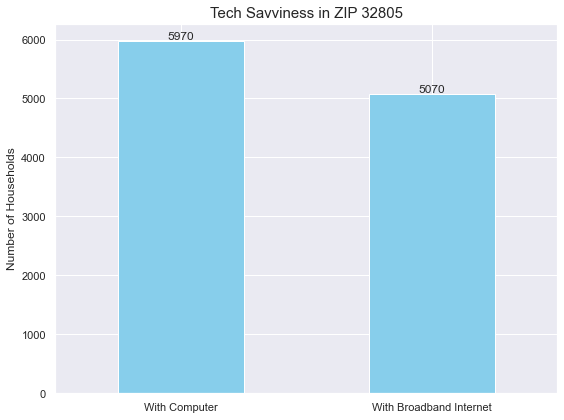

5970 out of 6846 households (87.20%) have with computer.
5070 out of 6846 households (74.06%) have with broadband internet.
------------------------------------------------------------ 

-----------------Analysis for ZIP Code: 32808------------------- 

--------------------Demographic Analysis------------------------ 

Total Population: 62827
Sex Ratio (Males per 100 Females): 90.0%


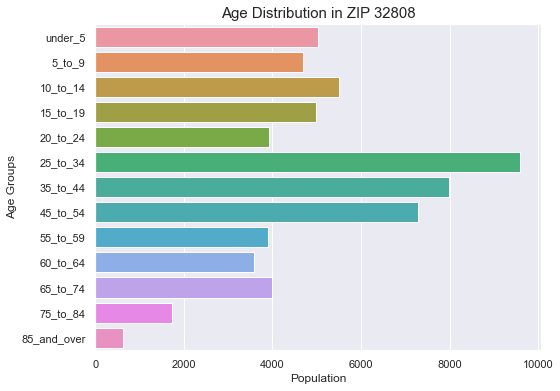

Top 5 age groups are: 

25_to_34: 9591
35_to_44: 7992
45_to_54: 7291
10_to_14: 5493
under_5: 5033

The median age is 32.1.



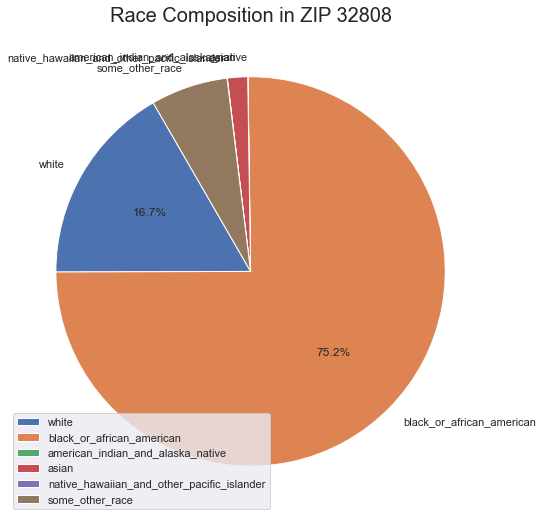

The majority race is black_or_african_american.



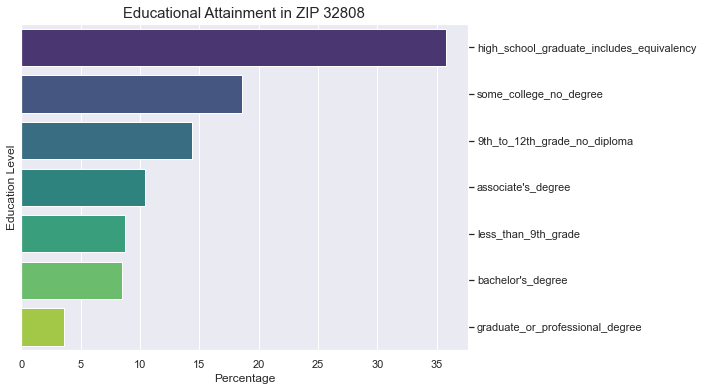

The majority of the population (ages 25 and above) have the education level high_school_graduate_includes_equivalency with 35.8%.

Employment Rate: 89.62% (27620/30820)
Poverty Rate (in last 12 months): 23.4%
Median Income for a worker: $28112


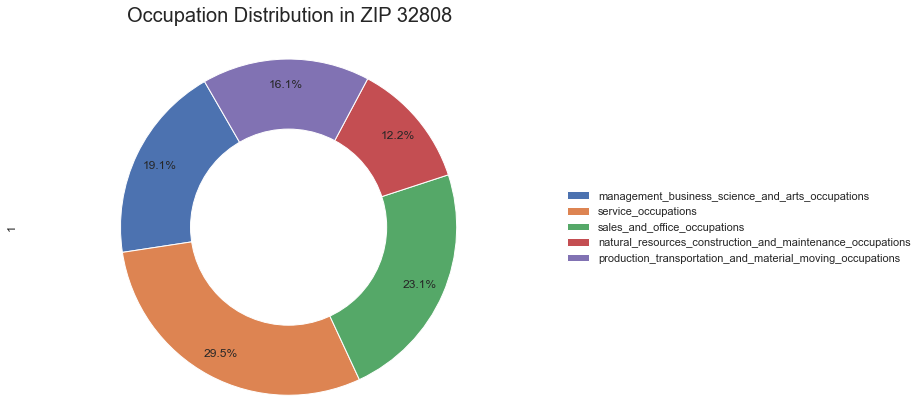

------------------------------------------------------------ 

--------------------Housing Analysis------------------------ 

Total Housing Units: 21248
Occupied/Vacant Housing Units: 19816/1432


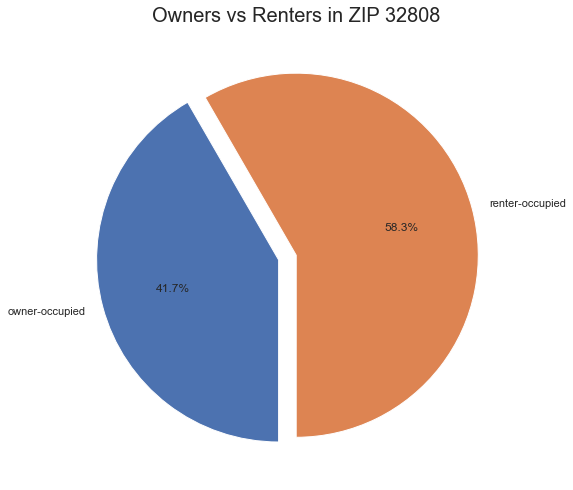

Majority of the housing units are renter-occupied
Median Household Income: $43726


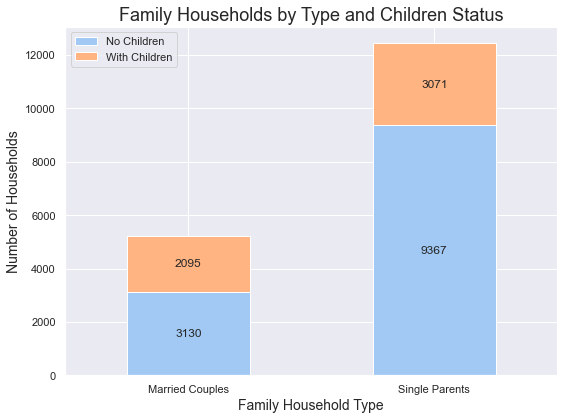

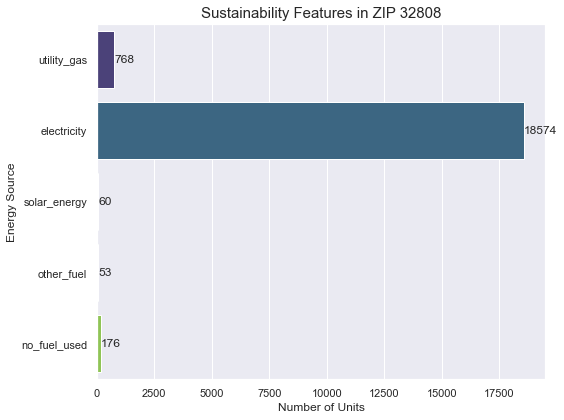

Number of units with solar energy installations: 60 

Out of 19816 occupied units, 19816 of them have computers and/or internet


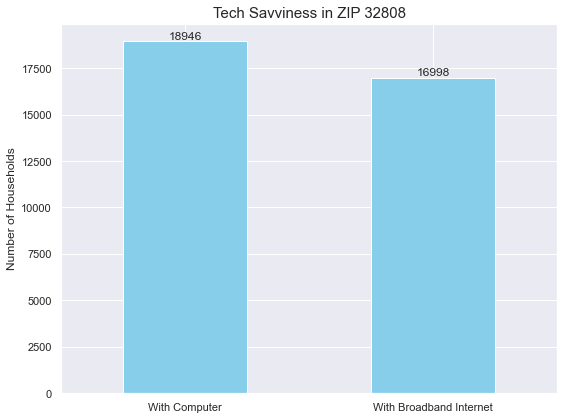

18946 out of 19816 households (95.61%) have with computer.
16998 out of 19816 households (85.78%) have with broadband internet.
------------------------------------------------------------ 

-----------------Analysis for ZIP Code: 32822------------------- 

--------------------Demographic Analysis------------------------ 

Total Population: 68321
Sex Ratio (Males per 100 Females): 96.1%


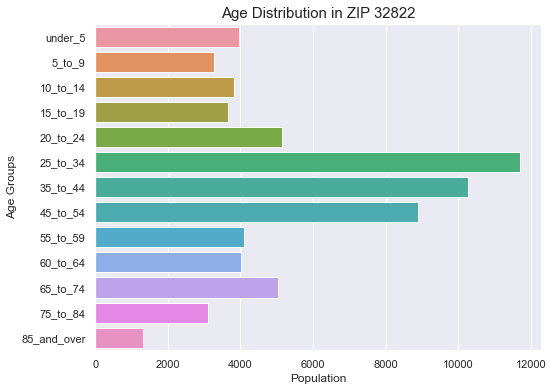

Top 5 age groups are: 

25_to_34: 11704
35_to_44: 10280
45_to_54: 8880
20_to_24: 5142
65_to_74: 5040

The median age is 37.5.



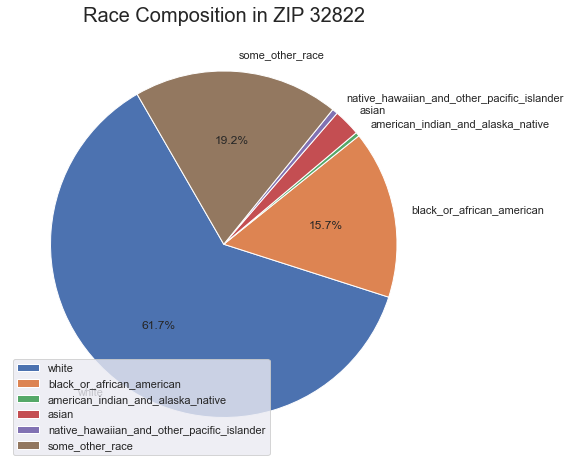

The majority race is white.



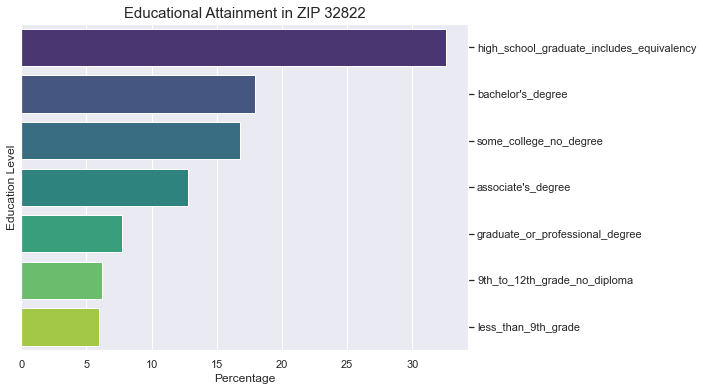

The majority of the population (ages 25 and above) have the education level high_school_graduate_includes_equivalency with 32.6%.

Employment Rate: 94.34% (34681/36760)
Poverty Rate (in last 12 months): 16.6%
Median Income for a worker: $29912


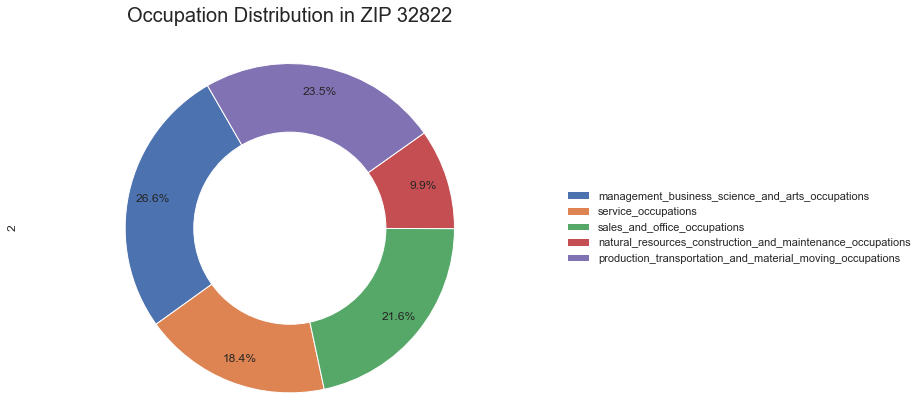

------------------------------------------------------------ 

--------------------Housing Analysis------------------------ 

Total Housing Units: 26887
Occupied/Vacant Housing Units: 23943/2944


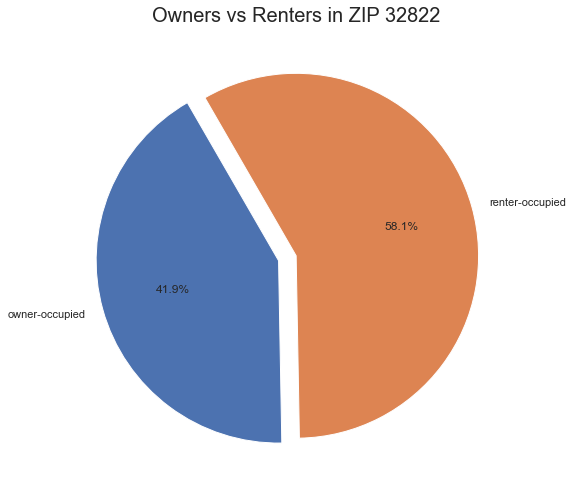

Majority of the housing units are renter-occupied
Median Household Income: $51555


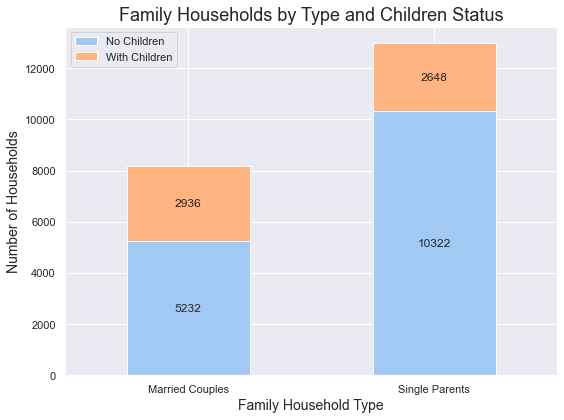

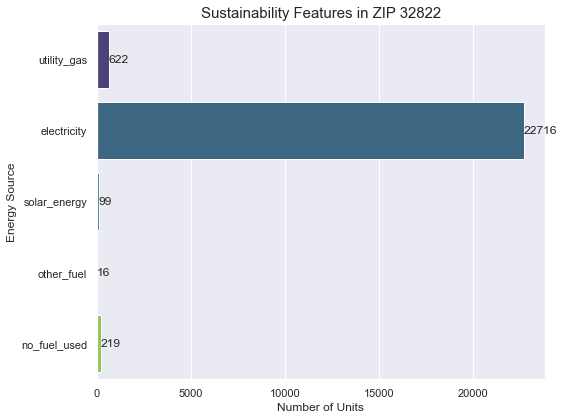

Number of units with solar energy installations: 99 

Out of 23943 occupied units, 23943 of them have computers and/or internet


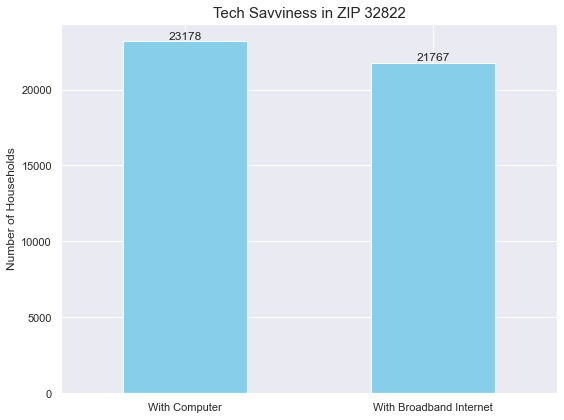

23178 out of 23943 households (96.80%) have with computer.
21767 out of 23943 households (90.91%) have with broadband internet.
------------------------------------------------------------ 



In [371]:
for zip_code in merged_df['zip_code'].unique():
    print(f"\033[1m-----------------Analysis for ZIP Code: {zip_code}-------------------\033[0m \n")
    print("\033[1m--------------------Demographic Analysis------------------------\033[0m \n")
    df_zip = merged_df[merged_df['zip_code'] == zip_code]
    
    total_population = df_zip['est_sex_and_age_total_pop'].iloc[0]
    sex_ratio = df_zip['est_sex_and_age_total_pop_sex_ratio_males_per_100_females'].iloc[0]
    print(f"Total Population: \033[1m{total_population}\033[0m")
    print(f"Sex Ratio (Males per 100 Females): \033[1m{sex_ratio}%\033[0m")
    
    
    age_distribution = df_zip[age_columns].iloc[0]
    age_distribution.index = [extract_label(col, 'pop_').replace('_years', '') for col in age_distribution.index]
    top_5_ages = age_distribution.nlargest(5)
    median_age = df_zip['est_sex_and_age_total_pop_median_age_years'].iloc[0]
    
    sns.barplot(x=age_distribution.values, y=age_distribution.index)
    plt.title(f'Age Distribution in ZIP {zip_code}')
    plt.xlabel('Population')
    plt.ylabel('Age Groups')
    plt.show()
    print(f"Top 5 age groups are: \n")
    for age_group, population in top_5_ages.items():
        print(f"\033[1m{age_group}\033[0m: {population}")
    print(f"\nThe median age is \033[1m{median_age}\033[0m.\n")
    
    
    race_distribution = df_zip[race_columns].iloc[0]
    race_distribution.index = [extract_label(col, 'race_') for col in race_distribution.index]
    top_race = race_distribution.sort_values(ascending=False).index[0]
    top_race_percent = (race_distribution.sort_values(ascending=False).iloc[0] / total_population) * 100

    race_distribution.plot(kind='pie',
                           autopct=lambda p: '{:.1f}%'.format(p) if p > 10 else '',  
                           legend=True,
                           figsize=(8,8),
                           startangle=120)
    plt.title(f'Race Composition in ZIP {zip_code}', fontsize=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    print(f"The majority race is \033[1m{top_race}\033[0m.\n")
    
    
    edu_data = df_zip[edu_columns].iloc[0].sort_values(ascending=False)
    edu_data.index = [extract_label(col, 'over_') for col in edu_data.index]
    top_edu = edu_data.idxmax()  

    fig, ax = plt.subplots()
    sns.barplot(x=edu_data.values, y=edu_data.index, palette="viridis", ax=ax)
    plt.title(f'Educational Attainment in ZIP {zip_code}')
    plt.xlabel('Percentage')
    plt.ylabel('Education Level')
    ax.yaxis.tick_right()
    plt.show()
    print(f"The majority of the population (ages 25 and above) have the education level \033[1m{top_edu}\033[0m with \033[1m{edu_data.max()}%\033[0m.\n")
    
    
    employed_population = df_zip['est_employment_status_pop_16_years_and_over_in_labor_force_civilian_labor_force_employed'].iloc[0]
    civilian_labor_force = df_zip['est_employment_status_pop_16_years_and_over_in_labor_force_civilian_labor_force'].iloc[0]
    employment_rate = (employed_population / civilian_labor_force) * 100
    print(f"Employment Rate: \033[1m{employment_rate:.2f}%\033[0m ({employed_population}/{civilian_labor_force})")
    

    poverty_rate = df_zip['per_perage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_all_people'].iloc[0]
    print(f"Poverty Rate (in last 12 months): \033[1m{poverty_rate}%\033[0m")
    
    
    median_household_income = df_zip['est_income_and_benefits_in_2022_inflation-adjusted_dollars_median_earnings_for_workers_dollars'].iloc[0]
    print(f"Median Income for a worker: \033[1m${median_household_income}\033[0m")
    
    
    occupation_distribution = df_zip[occ_columns].iloc[0]
    occupation_distribution.index = [extract_label(col, 'over_') for col in occupation_distribution.index]    
    
    occupation_distribution.plot(kind='pie', 
                                 autopct='%1.1f%%', 
                                 startangle=120, 
                                 labels=None,
                                 legend=True,
                                 pctdistance=0.85, 
                                 radius=1.2)
    plt.title(f'Occupation Distribution in ZIP {zip_code}', pad=20, fontsize=20)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.axis('equal') 
    plt.tight_layout()
    plt.legend(labels=occupation_distribution.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.show()    
    print("\033[1m------------------------------------------------------------\033[0m \n")
    print("\033[1m--------------------Housing Analysis------------------------\033[0m \n")
    
    
    total_units = df_zip['est_total_housing_units'].iloc[0]
    occupied_units = df_zip['est_housing_occupancy_total_housing_units_occupied_housing_units'].iloc[0]
    vacant_units = df_zip['est_housing_occupancy_total_housing_units_vacant_housing_units'].iloc[0]
    print(f"Total Housing Units: \033[1m{total_units}\033[0m")
    print(f"Occupied/Vacant Housing Units: \033[1m{occupied_units}/{vacant_units}\033[0m")
    
    
    occupied_type = df_zip[['est_housing_tenure_occupied_housing_units_owner-occupied','est_housing_tenure_occupied_housing_units_renter-occupied']].iloc[0]
    occupied_type.index = [extract_label(col, 'units_') for col in occupied_type.index]    

    occupied_type.plot(kind='pie',
                        explode=(0.1, 0),
                        autopct='%1.1f%%', 
                        figsize=(8,8),
                        startangle=120,
                        colors=sns.color_palette("deep"))
    plt.title(f'Owners vs Renters in ZIP {zip_code}', fontsize=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    print(f"Majority of the housing units are \033[1m{occupied_type.idxmax()}\033[0m")
    
    
    median_household_income = df_zip['est_income_and_benefits_in_2022_inflation-adjusted_dollars_total_households_median_household_income_dollars'].iloc[0]
    print(f"Median Household Income: \033[1m${median_household_income}\033[0m")
    
    
    married_with_children = df_zip['est_households_by_type_total_households_married-couple_household_with_children_of_the_householder_under_18_years'].iloc[0]
    married_no_children = df_zip['est_households_by_type_total_households_married-couple_household'].iloc[0] - married_with_children

    single_parent_with_children = df_zip['est_households_by_type_total_households_female_householder_no_spouse/partner_present_with_children_of_the_householder_under_18_years'].iloc[0] + \
                                  df_zip['est_households_by_type_total_households_male_householder_no_spouse/partner_present_with_children_of_the_householder_under_18_years'].iloc[0]
    single_parent_no_children = df_zip['est_households_by_type_total_households_female_householder_no_spouse/partner_present'].iloc[0] + \
                                df_zip['est_households_by_type_total_households_male_householder_no_spouse/partner_present'].iloc[0] - \
                                single_parent_with_children

    family_structure_df = pd.DataFrame({
        'No Children': [married_no_children, single_parent_no_children],
        'With Children': [married_with_children, single_parent_with_children]
    }, index=['Married Couples', 'Single Parents'])

    ax = family_structure_df.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
    ax.set_title('Family Households by Type and Children Status', fontsize=18)
    ax.set_xlabel('Family Household Type', fontsize=14)
    ax.set_ylabel('Number of Households', fontsize=14)
    plt.xticks(rotation=0)

    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', label_type='center')

    plt.tight_layout()
    plt.show()

    
    sustainability_features = df_zip[sus_columns].iloc[0]
    sustainability_features.index = [extract_label(col, 'units_') for col in sustainability_features.index]    

    sns.barplot(x=sustainability_features.values, y=sustainability_features.index, palette="viridis")
    plt.title(f'Sustainability Features in ZIP {zip_code}')
    plt.xlabel('Number of Units')
    plt.ylabel('Energy Source')

    for index, value in enumerate(sustainability_features.values):
        plt.text(value, index, str(value), va='center')

    plt.tight_layout()
    plt.show()
    print(f"Number of units with solar energy installations: \033[1m{sustainability_features['solar_energy']}\033[0m \n")

    
    tech_data = {
        'With Computer': df_zip['est_computers_and_internet_use_total_households_with_a_computer'].iloc[0],
        'With Broadband Internet': df_zip['est_computers_and_internet_use_total_households_with_a_broadband_internet_subscription'].iloc[0]
    }
    tech_df = pd.DataFrame(list(tech_data.values()), index=tech_data.keys(), columns=['Number of Households'])

    total_computer_households = df_zip['est_computers_and_internet_use_total_households'].iloc[0]
    print(f"Out of \033[1m{occupied_units}\033[0m occupied units, \033[1m{total_computer_households}\033[0m of them have computers and/or internet")

    tech_df.plot(kind='bar', color=["skyblue", "limegreen"], legend=False)
    plt.title(f'Tech Savviness in ZIP {zip_code}')
    plt.ylabel('Number of Households')
    plt.xticks(rotation=0, ha='center')
    plt.tight_layout()

    for index, value in enumerate(tech_df['Number of Households']):
        plt.text(index, value, str(value), ha='center', va='bottom')
    plt.show()
    
    
    for feature, count in tech_data.items():
        percent = (count / total_computer_households) * 100
        print(f"\033[1m{count}\033[0m out of {total_computer_households} households \033[1m({percent:.2f}%)\033[0m have {feature.lower()}.")

    print("\033[1m------------------------------------------------------------\033[0m \n")

This is just something I came up with quick. The cleaned dataset has 1050 columns that can be analyzed to be more granular and more detailed. Additionally, we can also add more columns to this from the census.gov website. Enjoy!

In [373]:
for zip_code in merged_df['zip_code'].unique():
    print(f"\033[1m-----------------Analysis for ZIP Code: {zip_code}-------------------\033[0m \n")
    print("\033[1m--------------------Demographic Analysis------------------------\033[0m \n")
    df_zip = merged_df[merged_df['zip_code'] == zip_code]
    
    total_population = df_zip['est_sex_and_age_total_pop'].iloc[0]
    sex_ratio = df_zip['est_sex_and_age_total_pop_sex_ratio_males_per_100_females'].iloc[0]
    print(f"Total Population: \033[1m{total_population}\033[0m")
    print(f"Sex Ratio (Males per 100 Females): \033[1m{sex_ratio}%\033[0m")
    
    
    age_distribution = df_zip[age_columns].iloc[0]
    age_distribution.index = [extract_label(col, 'pop_').replace('_years', '') for col in age_distribution.index]
    top_5_ages = age_distribution.nlargest(5)
    median_age = df_zip['est_sex_and_age_total_pop_median_age_years'].iloc[0]
    
    print(f"Top 5 age groups are: \n")
    for age_group, population in top_5_ages.items():
        print(f"\033[1m{age_group}\033[0m: {population}")
    print(f"\nThe median age is \033[1m{median_age}\033[0m.\n")
    
    
    race_distribution = df_zip[race_columns].iloc[0]
    race_distribution.index = [extract_label(col, 'race_') for col in race_distribution.index]
    top_race = race_distribution.sort_values(ascending=False).index[0]
    top_race_percent = (race_distribution.sort_values(ascending=False).iloc[0] / total_population) * 100
    print(f"The majority race is \033[1m{top_race}\033[0m.\n")
    
    
    edu_data = df_zip[edu_columns].iloc[0].sort_values(ascending=False)
    edu_data.index = [extract_label(col, 'over_') for col in edu_data.index]
    top_edu = edu_data.idxmax()  
    print(f"The majority of the population (ages 25 and above) have the education level \033[1m{top_edu}\033[0m with \033[1m{edu_data.max()}%\033[0m.\n")
    
    
    employed_population = df_zip['est_employment_status_pop_16_years_and_over_in_labor_force_civilian_labor_force_employed'].iloc[0]
    civilian_labor_force = df_zip['est_employment_status_pop_16_years_and_over_in_labor_force_civilian_labor_force'].iloc[0]
    employment_rate = (employed_population / civilian_labor_force) * 100
    print(f"Employment Rate: \033[1m{employment_rate:.2f}%\033[0m ({employed_population}/{civilian_labor_force})")
    

    poverty_rate = df_zip['per_perage_of_families_and_people_whose_income_in_the_past_12_months_is_below_the_poverty_level_all_people'].iloc[0]
    print(f"Poverty Rate (in last 12 months): \033[1m{poverty_rate}%\033[0m")
    
    
    median_household_income = df_zip['est_income_and_benefits_in_2022_inflation-adjusted_dollars_median_earnings_for_workers_dollars'].iloc[0]
    print(f"Median Income for a worker: \033[1m${median_household_income}\033[0m")
    
    print("\033[1m------------------------------------------------------------\033[0m \n")
    print("\033[1m--------------------Housing Analysis------------------------\033[0m \n")
    
    
    total_units = df_zip['est_total_housing_units'].iloc[0]
    occupied_units = df_zip['est_housing_occupancy_total_housing_units_occupied_housing_units'].iloc[0]
    vacant_units = df_zip['est_housing_occupancy_total_housing_units_vacant_housing_units'].iloc[0]
    print(f"Total Housing Units: \033[1m{total_units}\033[0m")
    print(f"Occupied/Vacant Housing Units: \033[1m{occupied_units}/{vacant_units}\033[0m")
    
    
    occupied_type = df_zip[['est_housing_tenure_occupied_housing_units_owner-occupied','est_housing_tenure_occupied_housing_units_renter-occupied']].iloc[0]
    occupied_type.index = [extract_label(col, 'units_') for col in occupied_type.index]    
    print(f"Majority of the housing units are \033[1m{occupied_type.idxmax()}\033[0m \n")
    
    
    median_household_income = df_zip['est_income_and_benefits_in_2022_inflation-adjusted_dollars_total_households_median_household_income_dollars'].iloc[0]
    print(f"Median Household Income: \033[1m${median_household_income}\033[0m \n")
    
    
    married_with_children = df_zip['est_households_by_type_total_households_married-couple_household_with_children_of_the_householder_under_18_years'].iloc[0]
    married_no_children = df_zip['est_households_by_type_total_households_married-couple_household'].iloc[0] - married_with_children

    single_parent_with_children = df_zip['est_households_by_type_total_households_female_householder_no_spouse/partner_present_with_children_of_the_householder_under_18_years'].iloc[0] + \
                                  df_zip['est_households_by_type_total_households_male_householder_no_spouse/partner_present_with_children_of_the_householder_under_18_years'].iloc[0]
    single_parent_no_children = df_zip['est_households_by_type_total_households_female_householder_no_spouse/partner_present'].iloc[0] + \
                                df_zip['est_households_by_type_total_households_male_householder_no_spouse/partner_present'].iloc[0] - \
                                single_parent_with_children

    family_structure_df = pd.DataFrame({
        'No Children': [married_no_children, single_parent_no_children],
        'With Children': [married_with_children, single_parent_with_children]
    }, index=['Married Couples', 'Single Parents'])

    
    sustainability_features = df_zip[sus_columns].iloc[0]
    sustainability_features.index = [extract_label(col, 'units_') for col in sustainability_features.index]    
    print(f"Number of units with solar energy installations: \033[1m{sustainability_features['solar_energy']}\033[0m \n")
    
    
    total_computer_households = df_zip['est_computers_and_internet_use_total_households'].iloc[0]
    print(f"Out of \033[1m{occupied_units}\033[0m occupied units, \033[1m{total_computer_households}\033[0m of them have computers and/or internet.")
    
    tech_data = {
        'With Computer': df_zip['est_computers_and_internet_use_total_households_with_a_computer'].iloc[0],
        'With Broadband Internet': df_zip['est_computers_and_internet_use_total_households_with_a_broadband_internet_subscription'].iloc[0]
    }
    tech_df = pd.DataFrame(list(tech_data.values()), index=tech_data.keys(), columns=['Number of Households'])
    
    
    for feature, count in tech_data.items():
        percent = (count / total_computer_households) * 100
        print(f"\033[1m{count}\033[0m out of {total_computer_households} households \033[1m({percent:.2f}%)\033[0m have {feature.lower()}.")

    print("\033[1m------------------------------------------------------------\033[0m \n")

-----------------Analysis for ZIP Code: 32805------------------- 

--------------------Demographic Analysis------------------------ 

Total Population: 17791
Sex Ratio (Males per 100 Females): 93.5%
Top 5 age groups are: 

25_to_34: 2680
35_to_44: 2422
45_to_54: 2299
65_to_74: 2042
55_to_59: 1673

The median age is 43.7.

The majority race is black_or_african_american.

The majority of the population (ages 25 and above) have the education level high_school_graduate_includes_equivalency with 38.2%.

Employment Rate: 95.72% (8846/9242)
Poverty Rate (in last 12 months): 21.1%
Median Income for a worker: $28021
------------------------------------------------------------ 

--------------------Housing Analysis------------------------ 

Total Housing Units: 9350
Occupied/Vacant Housing Units: 6846/2504
Majority of the housing units are renter-occupied 

Median Household Income: $38885 

Number of units with solar energy installations: 32 

Out of 6846 occupied units, 6846 of them have comput